<a href="https://colab.research.google.com/github/GilbertHD/HD2103/blob/main/HD_08_03_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 43kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=8530979983b8fa47171b600334f909f68dbcdb398fb09a3b6feb45d680280290
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [4]:
# https://github.com/priya-dwivedi/face_and_emotion_detection

from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2

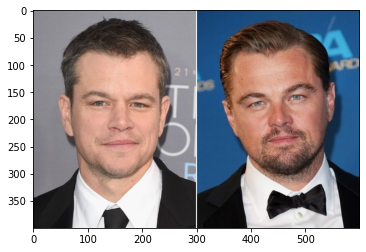

In [ ]:
image1 = Image.open("./test_images/040wrmpyTF5l.jpg")
image_array1 = np.array(image1)
plt.imshow(image_array1)

In [ ]:
image = face_recognition.load_image_file("./test_images/040wrmpyTF5l.jpg")
face_locations = face_recognition.face_locations(image)

In [ ]:
face_locations

[(133, 236, 288, 81), (116, 528, 270, 373)]

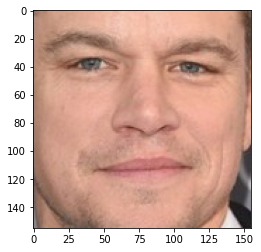

In [ ]:
top, right, bottom, left = face_locations[0]
face_image1 = image[top:bottom, left:right]
plt.imshow(face_image1)
image_save = Image.fromarray(face_image1)
image_save.save("image_1.jpg")

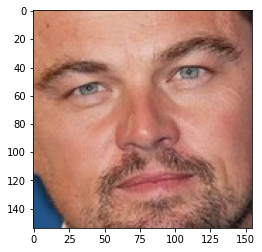

In [ ]:

top, right, bottom, left = face_locations[1]
face_image2 = image[top:bottom, left:right]
plt.imshow(face_image2)
image_save = Image.fromarray(face_image2)
image_save.save("image_2.jpg")

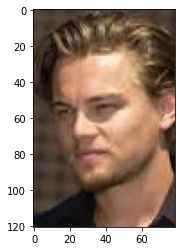

In [ ]:
image1 = Image.open("./test_images/index2.jpeg")
image_array1 = np.array(image1)
plt.imshow(image_array1)

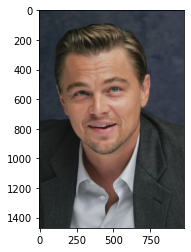

In [ ]:
image2 = Image.open("./test_images/index1.jpg")
image_array2 = np.array(image2)
plt.imshow(image_array2)

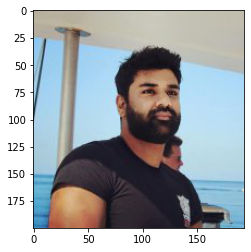

In [ ]:
image3 = Image.open("./test_images/rajeev.jpg")
image_array3 = np.array(image3)
plt.imshow(image_array3)

In [ ]:
!pip install face_recognition

In [ ]:
image1 = face_recognition.load_image_file("./test_images/index1.jpg")
image2 = face_recognition.load_image_file("./test_images/index2.jpeg")
 
encoding_1 = face_recognition.face_encodings(image1)[0]

encoding_2 = face_recognition.face_encodings(image2)[0]

results = face_recognition.compare_faces([encoding_1], encoding_2,tolerance=0.50)

In [ ]:
print(results)

[True]


In [ ]:
image3 = face_recognition.load_image_file("./test_images/rajeev.jpg")
encoding_3 = face_recognition.face_encodings(image3)[0]

results = face_recognition.compare_faces([encoding_1], encoding_3,tolerance=0.50)

In [ ]:
print(results)

[False]


In [ ]:
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

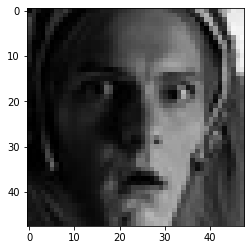

In [ ]:
face_image  = cv2.imread("./test_images/39.jpg")
#face_image  = cv2.imread("./test_images/happy1.jpg")
plt.imshow(face_image)

In [ ]:
print (face_image.shape)

(1092, 1200, 3)


In [ ]:
#face_image = face_recognition.load_image_file("./test_images/39.jpg")
#face_locations = face_recognition.face_locations(face_image)
#top, right, bottom, left = face_locations[0]
#face_image = face_image[top:bottom, left:right]
#plt.imshow(face_image)

In [ ]:
# resizing the image
face_image = cv2.resize(face_image, (64,64))
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])

In [ ]:
model = load_model("./emotion_detector_models/emotion_model.hdf5")

10-03-2021:07:50:47,252 WARNING  [hdf5_format.py:217] Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.


In [ ]:
print(face_image.shape)

(1, 64, 64, 1)


In [ ]:
predicted_class = np.argmax(model.predict(face_image)[0])
predicted_class

0

In [ ]:
x = np.array(model.predict(face_image)[0])

x.argmax()

0

In [ ]:
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]
predicted_label

'Angry'

In [ ]:
print(model.predict(face_image)[0][2])

a = model.predict(face_image)[0][2]
b = model.predict(face_image)[0][0]

if a > b:
  

9.4019214e-21
